In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from text2topics import reports
from text2topics import utilities
from text2topics import clean
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "ST"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ST/baseline

Average verified rate: 0.9456481148200234

Average of error rates: 0.05545122187742437

Total token count: 36908545



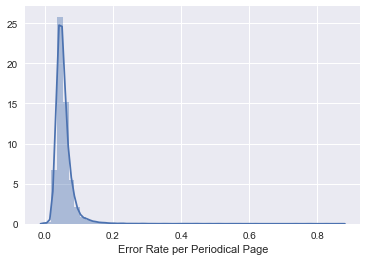

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 1000 )

[('-', 71819),
 (')', 39961),
 ('ñ', 36059),
 ('¥', 29487),
 ("'", 28740),
 ('(', 21095),
 ('e', 20821),
 ('re-', 19656),
 ('m', 18049),
 ('tion', 17964),
 ('con-', 17104),
 ('d', 16965),
 ('w', 16732),
 ('n', 15374),
 ('t', 14460),
 ('in-', 14383),
 ('be-', 13231),
 ('r', 10941),
 ('g', 10890),
 ('ñthe', 10869),
 ('de-', 10750),
 ('com-', 10356),
 ('ment', 8671),
 ('th', 8267),
 ('ex-', 7926),
 ('f', 7733),
 ('pp', 6853),
 ('un-', 5605),
 ('co', 5591),
 ('dis-', 5532),
 ('tions', 5111),
 ('per-', 4906),
 ('*', 4847),
 ('pro-', 4676),
 ('en-', 4617),
 ('ña', 4490),
 ('im-', 4097),
 ('pre-', 3949),
 ('u', 3879),
 ('ac-', 3742),
 ('ments', 3575),
 ('an-', 3420),
 ('sab-', 3238),
 ('_', 3099),
 ('x', 3056),
 (']', 3045),
 ('ex', 3028),
 ('ad-', 2997),
 ('ence', 2982),
 ('chris-', 2975),
 ('ap-', 2905),
 ('for-', 2485),
 ('ple', 2458),
 ('ful', 2375),
 ('sub-', 2304),
 ('al-', 2292),
 ('-the', 2280),
 ('to-', 2269),
 ('mo', 2212),
 ('ance', 2210),
 ('mis-', 2201),
 ("'the", 2170),
 ('ers',

## Review Special Character Use

In [12]:
reports.tokens_with_special_characters(errors_summary)

[(')', 39961),
 ('ñ', 36059),
 ('¥', 29487),
 ('(', 21095),
 ('ñthe', 10869),
 ('*', 4847),
 ('ña', 4490),
 ('_', 3099),
 (']', 3045),
 ('(continued', 1926),
 ('ł', 1901),
 ('/', 1875),
 ('š', 1668),
 ('ñit', 1596),
 ('[', 1519),
 ('[the', 1475),
 ('copies)', 1437),
 ('%', 1132),
 ('(see', 1121),
 ('šthe', 1113),
 ('(the', 1029),
 ('ñin', 1008),
 ('(john', 996),
 ('•', 945),
 ('`', 929),
 ('¥¥', 900),
 ('(rom', 799),
 ('ñselected', 774),
 ('ã', 753),
 ('ñsel', 736),
 ('(a', 732),
 ('(entered', 723),
 ('(rev', 685),
 ('ñan', 685),
 ('(for', 668),
 ('(matt', 665),
 ('(luke', 656),
 ('ñthere', 638),
 ('+', 632),
 ('ñrev', 621),
 ('numbers)', 621),
 ('(verse', 616),
 ('(to', 614),
 ('ñno', 548),
 ('(acts', 542),
 ('¡', 539),
 ('ñchristian', 530),
 ('=', 519),
 ('ñwe', 507),
 ('ñthat', 506),
 ('ñand', 490),
 ('(isa', 488),
 ('(ps', 487),
 ('ñat', 479),
 ('ša', 477),
 ('\\', 469),
 ('(b', 449),
 ('(concluded', 444),
 ('ñdr', 444),
 ('(heb', 441),
 ('**', 407),
 ('ñon', 407),
 ('(page', 406),

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ST/correction1

Average verified rate: 0.9549642739204225

Average of error rates: 0.045730168735453845

Total token count: 36801827



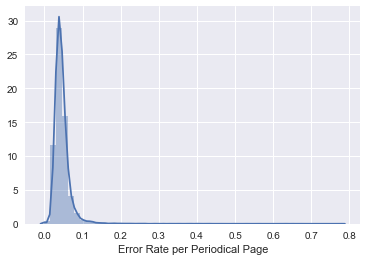

In [14]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('-', 74435),
 ("'", 30070),
 ('e', 21612),
 ('re-', 19702),
 ('m', 18395),
 ('tion', 18077),
 ('d', 17384),
 ('w', 17149),
 ('con-', 17144),
 ('n', 16127),
 ('t', 15594),
 ('in-', 14457),
 ('be-', 13281),
 ('r', 11778),
 ('g', 11219),
 ('de-', 10768),
 ('com-', 10381),
 ('ment', 8721),
 ('th', 8395),
 ('f', 8179),
 ('ex-', 7949),
 ('pp', 6891),
 ('co', 5647),
 ('un-', 5627),
 ('dis-', 5541),
 ('tions', 5137),
 ('per-', 4928),
 ('pro-', 4693),
 ('en-', 4626),
 ('im-', 4106),
 ('u', 4030),
 ('pre-', 3954),
 ('ac-', 3748),
 ('ments', 3603),
 ('ex', 3435),
 ('an-', 3434),
 ('x', 3377),
 ('sab-', 3253),
 ('chris-', 3015),
 ('ence', 3014),
 ('ad-', 3004),
 ('ap-', 2910),
 ('for-', 2495),
 ('ple', 2466),
 ('ful', 2381),
 ('sub-', 2306),
 ('al-', 2304),
 ('-the', 2301),
 ('to-', 2280),
 ('ance', 2258)]

## Correction 2 -- Connect Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ST/correction2

Average verified rate: 0.974700822761197

Average of error rates: 0.025303190457719164

Total token count: 36254262



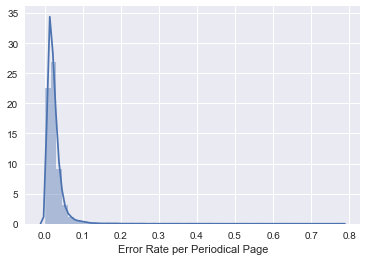

In [17]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('-', 73958),
 ("'", 30070),
 ('e', 21563),
 ('m', 18372),
 ('d', 17357),
 ('w', 17134),
 ('n', 16090),
 ('t', 15499),
 ('r', 11729),
 ('g', 11187),
 ('th', 8385),
 ('f', 8143),
 ('pp', 6879),
 ('co', 5639),
 ('u', 4024),
 ('ex', 3435),
 ('x', 3372),
 ('tion', 2391),
 ('-the', 2301),
 ('mo', 2241),
 ("'the", 2186),
 ('--', 2126),
 ('wm', 1940),
 ('k', 1754),
 ('eze', 1389),
 ('fifth-day', 1385),
 ("the'", 1308),
 ('society-', 1307),
 ('altho', 1272),
 ('ment', 1232),
 ('z', 1140),
 ("of'", 1130),
 ('wo', 989),
 ('pa', 984),
 ("'tis", 970),
 ('first-day', 941),
 ("'of", 913),
 ('q', 911),
 ('ti', 896),
 ("an'", 882),
 ('re-', 868),
 ('sel', 853),
 ('ets', 847),
 ("'and", 846),
 ('es', 843),
 ("'s", 779),
 ('con-', 774),
 ('al', 750),
 ('re', 714),
 ('va', 699)]

## Correction 3 -- Remove extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

ST18740604-V01-01-page1.txt: [('--that', '-that'), ('anti-', 'anti'), ('be-', 'be'), ('-as', 'as'), ('-damned', 'damned'), ('cut-', 'cut'), ('-voice', 'voice'), ('com-', 'com'), ('dis-', 'dis')]
ST18740604-V01-01-page2.txt: [('--------', '-------'), ('-', ''), ('Christ.-', 'Christ.'), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-figurative', 'figurative'), ('--', '-'), ('-', ''), ('-', ''), ('-', '')]
ST18740604-V01-01-page3.txt: [('know-', 'know'), ('-', ''), ('-', ''), ('speci-', 'speci'), ('con-', 'con'), ('-reaching', 'reaching'), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('then-', 'then'), ('testa-', 'testa'), ('ob-', 'ob'), ('-', ''), ('conver-', 'conver'), ('-', ''), ('king-', 'king'), ('en-', 'en'), ('affec-', 'affec'), ('translation-', 'translation')]
ST18740604-V01-01-page4.txt: [('sac-', 'sac'), ('sup-', 'sup'), ('humili-', 'humili'), ('-', ''), ('minis-', 'minis')]
ST18740604-V01-01-page5.txt: [('-', ''), ('-manner', 'manner'), ('In-', '

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ST/correction2

Average verified rate: 0.9797662702149353

Average of error rates: 0.02031497284716835

Total token count: 36327163



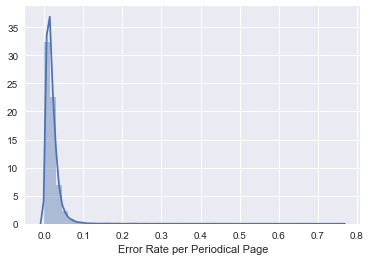

In [20]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 30814),
 ('e', 22165),
 ('m', 18502),
 ('d', 17472),
 ('w', 17325),
 ('n', 16324),
 ('t', 16186),
 ('r', 12202),
 ('g', 11368),
 ('th', 8466),
 ('f', 8330),
 ('pp', 6901),
 ('co', 6464),
 ('ex', 4469),
 ('u', 4135),
 ('x', 3478),
 ('re', 3266),
 ('tion', 3090),
 ('mo', 2315),
 ("'the", 2190),
 ('wm', 1964),
 ('k', 1903),
 ('ment', 1704),
 ('eze', 1392),
 ("the'", 1325),
 ('z', 1311),
 ('altho', 1276),
 ('ti', 1170),
 ("of'", 1132),
 ('pa', 1089),
 ('wo', 1006),
 ('es', 988),
 ('al', 983),
 ("'tis", 973),
 ('sel', 954),
 ('q', 930),
 ("'of", 915),
 ("an'", 883),
 ('pre', 870),
 ('ets', 851),
 ("'and", 848),
 ('tions', 847),
 ("'s", 787),
 ('id', 725),
 ('va', 711),
 ("''", 710),
 ('op', 659),
 ('io', 652),
 ("'to", 648),
 ('ments', 644)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

ST18740604-V01-01-page1.txt: [("'bead", 'bead'), ("'peas", 'peas')]
ST18740604-V01-01-page2.txt: [("'good", 'good'), ("'of", 'of')]
ST18740604-V01-01-page3.txt: [("'IPLES.", 'IPLES.'), ("'Zion", 'Zion'), ("'the", 'the'), ("'of", 'of')]
ST18740604-V01-01-page4.txt: [("'of", 'of'), ("'as", 'as')]
ST18740604-V01-01-page6.txt: [("'irk.", 'irk.'), ("'ninth", 'ninth'), ("'Others", 'Others')]
ST18740604-V01-01-page7.txt: [("'Ter.", 'Ter.')]
ST18740604-V01-01-page8.txt: [("'Ids", 'Ids'), ("'.", '.')]
ST18740611-V01-02-page1.txt: [("'Tis", 'Tis'), ("'Tis", 'Tis'), ("'Tis", 'Tis'), ("'tis", 'tis'), ("'wo", 'wo'), ("'Tis", 'Tis')]
ST18740611-V01-02-page2.txt: [("'Lord", 'Lord'), ("'be", 'be'), ("'by", 'by'), ("'this", 'this'), ("'with", 'with'), ("'point", 'point')]
ST18740611-V01-02-page3.txt: [("'bodes", 'bodes'), ("'men", 'men'), ("'the", 'the')]
ST18740611-V01-02-page4.txt: [("'Christ", 'Christ'), ("'farther", 'farther')]
ST18740611-V01-02-page5.txt: [("'sickness", 'sickness'), ("'seductive",

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ST/correction4

Average verified rate: 0.9807248104793586

Average of error rates: 0.019360308378588056

Total token count: 36329552



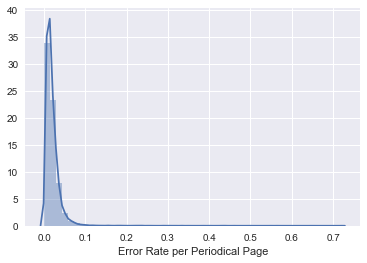

In [23]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 28887),
 ('e', 22320),
 ('m', 18561),
 ('d', 17540),
 ('w', 17363),
 ('t', 16487),
 ('n', 16448),
 ('r', 12280),
 ('g', 11387),
 ('th', 8483),
 ('f', 8399),
 ('pp', 6904),
 ('co', 6479),
 ('ex', 4472),
 ('u', 4137),
 ('x', 3485),
 ('re', 3308),
 ('tion', 3091),
 ('mo', 2317),
 ('wm', 1969),
 ('k', 1926),
 ('ment', 1704),
 ('eze', 1392),
 ('z', 1316),
 ("the'", 1295),
 ('altho', 1276),
 ('ti', 1178),
 ("of'", 1121),
 ('pa', 1095),
 ('wo', 1017),
 ('es', 995),
 ('al', 995),
 ('sel', 954),
 ('q', 933),
 ("an'", 878),
 ('pre', 871),
 ('ets', 853),
 ('tions', 848),
 ('id', 734),
 ('va', 711),
 ('op', 660),
 ('io', 654),
 ('ments', 644),
 ('un', 642),
 ("''", 633),
 ('mal', 593),
 ('ence', 589),
 ('ro', 581),
 ("if'", 564),
 ('aro', 554)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

ST18750304-V01-17-page4.txt: [('It', 'It')]
ST18750513-V01-27-page8.txt: [(' M y s t e r y ', 'Mystery')]
ST18750617-V01-32-page4.txt: [('It', 'It')]
ST18750812-V01-40-page8.txt: [('\nW a n te d ', 'Wanted')]
ST18750909-V01-44-page5.txt: [('It', 'It')]
ST18750909-V01-44-page6.txt: [('Go', 'Go')]
ST18760127-V02-09-page7.txt: [('It', 'It')]
ST18780103-V04-01-page4.txt: [('It', 'It')]
ST18780124-V04-04-page5.txt: [('It', 'It')]
ST18780307-V04-10-page8.txt: [('\nN e v a d a ', 'Nevada')]
ST18780425-V04-16-page5.txt: [('El', 'El'), ('Fe', 'Fe')]
ST18780523-V04-20-page8.txt: [('\nR e c e i v e d ', 'Received')]
ST18780711-V04-26-page2.txt: [('It', 'It')]
ST18781031-V04-41-page8.txt: [(' S o c i e t y ', 'Society'), ('\nD e n m a r k ', 'Denmark')]
ST18790206-V05-06-page8.txt: [('It', 'It'), ('It', 'It')]
ST18790306-V05-10-page8.txt: [('\nA d d r e s s e s ', 'Addresses')]
ST18790327-V05-13-page8.txt: [(' T u r k e y ', 'Turkey')]
ST18790403-V05-14-page3.txt: [('\nS A B B A T O N ', 'SABBATON

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ST/correction5

Average verified rate: 0.9807326014525145

Average of error rates: 0.0193508048875097

Total token count: 36329139



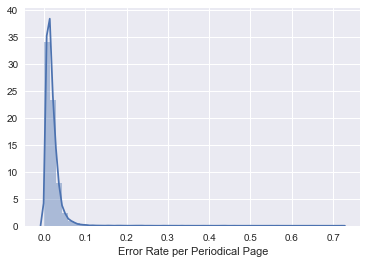

In [26]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 28888),
 ('e', 22224),
 ('m', 18545),
 ('d', 17545),
 ('w', 17348),
 ('t', 16421),
 ('n', 16418),
 ('r', 12206),
 ('g', 11373),
 ('th', 8482),
 ('f', 8383),
 ('pp', 6904),
 ('co', 6479),
 ('ex', 4472),
 ('u', 4118),
 ('x', 3483),
 ('re', 3317),
 ('tion', 3091),
 ('mo', 2317),
 ('wm', 1969),
 ('k', 1915),
 ('ment', 1704),
 ('eze', 1392),
 ('z', 1315),
 ("the'", 1295),
 ('altho', 1276),
 ('ti', 1178),
 ("of'", 1121),
 ('pa', 1095),
 ('wo', 1017),
 ('es', 993),
 ('al', 993),
 ('sel', 954),
 ('q', 933),
 ("an'", 878),
 ('pre', 871),
 ('ets', 853),
 ('tions', 848),
 ('id', 734),
 ('va', 711),
 ('op', 660),
 ('io', 651),
 ('ments', 644),
 ('un', 642),
 ("''", 633),
 ('mal', 593),
 ('ence', 589),
 ('ro', 581),
 ("if'", 564),
 ('aro', 554)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

ST18740604-V01-01-page2.txt: [('Je', 'hosaphat')]
ST18740604-V01-01-page8.txt: [('AL', 'A'), ('se', 'An')]
ST18740611-V01-02-page1.txt: [('long-suffer', 'ing'), ('honestl', 'y')]
ST18740611-V01-02-page3.txt: [('pre', 'millennial')]
ST18740611-V01-02-page4.txt: [('th', 'an')]
ST18740611-V01-02-page6.txt: [('Knowl', 'edge')]
ST18740611-V01-02-page7.txt: [('co', 'worker'), ('ac', 'company')]
ST18740611-V01-02-page8.txt: [('th', 'in')]
ST18740625-V01-03-page4.txt: [('th', 'e')]
ST18740625-V01-03-page6.txt: [('privi', 'leges'), ('Austri', 'an')]
ST18740625-V01-03-page8.txt: [('th', 'in'), ('G.', '')]
ST18740709-V01-04-page2.txt: [('re', 'cast')]
ST18740709-V01-04-page4.txt: [('th', 'e')]
ST18740709-V01-04-page5.txt: [('th', 'in')]
ST18740709-V01-04-page8.txt: [('ma', 'in'), ('desir', 'able'), ('embrac', 'ing')]
ST18740723-V01-05-page1.txt: [('Bu', 'rgundians'), ('stil', 'l')]
ST18740723-V01-05-page2.txt: [('op', 'poseth'), ('demi', 'gods')]
ST18740723-V01-05-page4.txt: [('co', 'operate')]
S

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ST/correction6

Average verified rate: 0.9813248784202824

Average of error rates: 0.01883397982932506

Total token count: 36314034



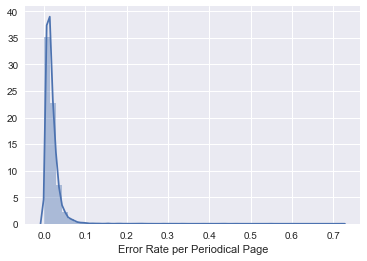

In [29]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 28888),
 ('e', 21984),
 ('m', 18624),
 ('d', 17477),
 ('w', 17329),
 ('n', 16330),
 ('t', 16275),
 ('r', 12148),
 ('g', 11324),
 ('f', 8369),
 ('th', 8148),
 ('pp', 6902),
 ('co', 5693),
 ('ex', 4176),
 ('u', 4106),
 ('x', 3480),
 ('tion', 2372),
 ('mo', 2269),
 ('wm', 1970),
 ('re', 1911),
 ('k', 1907),
 ('ment', 1611),
 ('eze', 1391),
 ('z', 1312),
 ("the'", 1295),
 ('altho', 1276),
 ("of'", 1121),
 ('ti', 1042),
 ('pa', 1032),
 ('wo', 985),
 ('sel', 935),
 ('q', 933),
 ('es', 907),
 ("an'", 878),
 ('ets', 852),
 ('al', 773),
 ('id', 713),
 ('va', 701),
 ('tions', 673),
 ('io', 643),
 ("''", 633),
 ('op', 620),
 ('ments', 614),
 ('mal', 577),
 ("if'", 564),
 ('aro', 554),
 ('ro', 554),
 ('ence', 540),
 ("and'", 534),
 ('oo', 526)]

## Correction 7 -- Rejoin Split Words II

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

ST18740611-V01-02-page7.txt: [('ac', 'company')]
ST18740625-V01-03-page8.txt: [('th', 'in')]
ST18740709-V01-04-page2.txt: [('re', 'constituted')]
ST18740709-V01-04-page5.txt: [('th', 'in')]
ST18740709-V01-04-page8.txt: [('desir', 'able'), ('embrac', 'ing')]
ST18740723-V01-05-page1.txt: [('stil', 'l')]
ST18740723-V01-05-page8.txt: [('th', 'aw')]
ST18741022-V01-08-page3.txt: [('th', 'at')]
ST18741022-V01-08-page5.txt: [('th', 'at')]
ST18741022-V01-08-page7.txt: [('th', 'at')]
ST18741022-V01-08-page8.txt: [('th', 'at')]
ST18741203-V01-10-page5.txt: [('conse', 'quently')]
ST18741203-V01-10-page7.txt: [('th', 'at')]
ST18741217-V01-11-page6.txt: [('co', 'operate')]
ST18741217-V01-11-page8.txt: [('Mc', 'Intyre')]
ST18741231-V01-12-page2.txt: [('Heav', 'en')]
ST18750128-V01-14-page1.txt: [('th', 'an')]
ST18750128-V01-14-page5.txt: [('direc', 'ted')]
ST18750128-V01-14-page7.txt: [('fa', 'ce')]
ST18750225-V01-16-page5.txt: [('menta', 'l')]
ST18750225-V01-16-page8.txt: [('M.', ''), ('th', 'at')]


Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ST/correction7

Average verified rate: 0.9813451332512316

Average of error rates: 0.01881734871993794

Total token count: 36313473



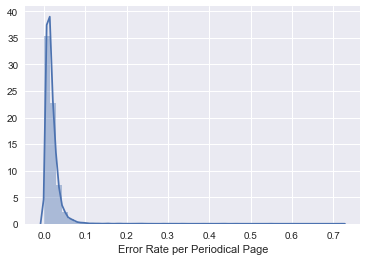

In [32]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 28888),
 ('e', 21981),
 ('m', 18624),
 ('d', 17477),
 ('w', 17329),
 ('n', 16330),
 ('t', 16273),
 ('r', 12147),
 ('g', 11323),
 ('f', 8369),
 ('th', 8144),
 ('pp', 6902),
 ('co', 5632),
 ('ex', 4129),
 ('u', 4106),
 ('x', 3480),
 ('tion', 2371),
 ('mo', 2269),
 ('wm', 1970),
 ('k', 1907),
 ('re', 1636),
 ('ment', 1611),
 ('eze', 1391),
 ('z', 1312),
 ("the'", 1295),
 ('altho', 1276),
 ("of'", 1121),
 ('ti', 1040),
 ('pa', 1030),
 ('wo', 985),
 ('sel', 935),
 ('q', 933),
 ('es', 906),
 ("an'", 878),
 ('ets', 852),
 ('al', 770),
 ('id', 713),
 ('va', 701),
 ('tions', 673),
 ('io', 643),
 ("''", 633),
 ('op', 618),
 ('ments', 614),
 ('mal', 577),
 ("if'", 564),
 ('aro', 554),
 ('ro', 553),
 ('ence', 540),
 ("and'", 534),
 ('oo', 525)]

## Check Remaining Errors

In [34]:
reports.docs_with_high_error_rate(summary)

[('ST19130311-V40-10-page1.txt', 0.72),
 ('ST19090224-V36-08-page1.txt', 0.603),
 ('ST19080527-V34-22-page1.txt', 0.551),
 ('ST18990920-V25-38-page1.txt', 0.548),
 ('ST19031223-V29-51-page1.txt', 0.469),
 ('ST18990329-V25-13-page1.txt', 0.462),
 ('ST19080727-V34-31-page1.txt', 0.439),
 ('ST19080708-V34-28-page1.txt', 0.438),
 ('ST19031216-V29-50-page13.txt', 0.429),
 ('ST18990809-V25-32-page1.txt', 0.429),
 ('ST19061121-V32-45-page1.txt', 0.4),
 ('ST19080226-V34-09-page1.txt', 0.385),
 ('ST19080715-V34-29-page1.txt', 0.341),
 ('ST19200323-V47-12-page1.txt', 0.333),
 ('ST19140901-V41-34-page1.txt', 0.333),
 ('ST19080513-V34-20-page3.txt', 0.318),
 ('ST19140512-V41-18-page1.txt', 0.309),
 ('ST19070821-V33-34-page1.txt', 0.303),
 ('ST19080415-V34-16-page1.txt', 0.299),
 ('ST19000704-V26-27-page1.txt', 0.29),
 ('ST19071023-V33-43-page1.txt', 0.288),
 ('ST19120123-V39-04-page1.txt', 0.262),
 ('ST19130722-V40-28-page1.txt', 0.254),
 ('ST19000110-V26-01-page14.txt', 0.245),
 ('ST19080311-V34-

In [37]:
check_docs = ['ST19031216-V29-50-page13.txt', 'ST19080513-V34-20-page3.txt', 'ST19000110-V26-01-page14.txt',
             'ST19000110-V26-02-page14.txt', 'ST19000627-V26-26-page15.txt','ST19000606-V26-23-page11.txt',
              'ST18861230-V12-50-page15.txt', 'ST19120521-V39-20-page6.txt', 'ST19120813-V39-31-page15.txt'
             ]

In [38]:
# %load shared_elements/high_error_rates.py
# doc_keys = [x[0] for x in reports.docs_with_high_error_rate(summary) if x[1] > 0.4]

utilities.open_original_docs(check_docs, directories['cycle'])

Opened files: 

ST19031216-V29-50-page13.txt

ST19080513-V34-20-page3.txt

ST19000110-V26-01-page14.txt

ST19000110-V26-02-page14.txt

ST19000627-V26-26-page15.txt

ST19000606-V26-23-page11.txt

ST18861230-V12-50-page15.txt

ST19120521-V39-20-page6.txt

ST19120813-V39-31-page15.txt



Most of the high error docs are the title pages. The remaining have inset images, torn pages, and charts. 

In [40]:
reports.long_errors(errors_summary, min_length=15)

(['money-graspfault',
  'lofmemoriadfcreation',
  'ebritishenegdoshrapnardwarietenrt',
  'shortofthatduanmentalskepticismwhich',
  'japanese-russian',
  'historyrtuarweil',
  'thermilitarismof',
  'interparliamentary',
  'inationoftheclaimthatsundayisthetrueseventh',
  'sympathetvisions',
  'becanioconvinced',
  'photoengravingplants',
  'toembapcecroawncoerisnhitphe',
  'fatherconditions',
  'sndiidiscouraged',
  'carefully-appointed',
  'foreigneountries',
  'steeply-inclined',
  'appleprogenitors',
  'takewsemigilhtfromtheload',
  'whatsongofpraiseisutteredbytheelders',
  'healthrestoration',
  'left-principally',
  'theexaminerandchroniclesays',
  "chrysostom'wrote",
  'pre-millennialists',
  'fullsignificance',
  'seven-and-twenty',
  "encroachments'on",
  "forhetty'ssakethemillerrepeatedhis",
  'approximatelyone',
  'semi-civilization',
  'iiiiiiiiltintmli',
  'seventhday-adventist',
  'disincorporation',
  'descripvineyards',
  'compretransgressions',
  'hissufferingsandcrucifix

## Correction 8 -- Remove long error tokens

In [44]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = "correction7"
cycle = "correction8"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(clean.check_for_repeating_characters(tokens, "i|I"))
    replacements.append(clean.check_for_repeating_characters(tokens, "m|M"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

ST18830906-V09-34-page2.txt: [('rwswirencooraresosssesamontamorammoomumErsmenwaveminnoniammaxmonmammannoamomeamo', ' '), ('mossureammevamenn.zovemosenaabiammannexaeuxammgmaugammemasomemmaatarawerrodormangussersamarsimarmeonscomp', ' ')]
ST18961008-V22-40-page14.txt: [('yailiiiiiiiiiiiiiiimiiiiithiliiiitmilitintitiiintillit', ' ')]
ST18961119-V22-46-page14.txt: [('SHIWIUMIIWISIIIIIIWIMIWOMMIIIMUIUMinh', ' ')]
ST18961126-V22-47-page14.txt: [('---."\'OMMMMMUMNIMMIIIMMMMWWWWWIIMUM', ' ')]
ST18971118-V23-45-page20.txt: [('ratirmrmiThrwrimmumuumwmwmgdmwrirmumnumrwwwwwmummommoirownianarromodurtmummerwmannuottromnuirmwommmwrolimmvory', ' '), ('FARAIPMAIVAIMPAAMINIAMMAMAIWIIMAMAIMANIAARMARIAPARINIAAMWMASIAMMAAMAISIAIMAANAMIUMIIMAPIAAAWAWAIWARAMAIARIAMAIRAMMARAAAWARAMAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA', ' ')]
ST18990105-V25-01-page22.txt: [('EIENIIIgigrunemmimmfinasdnaunimm', ' '), ('Mummonsammomm', ' ')]
ST18990215-V25-07-page3.txt: [('laNIMMINIEMMIENIMENAMMSSMEMEMEIMIENUMMIUMNSWAWSIZIVAR'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ST/correction8

Average verified rate: 0.9813510500615877

Average of error rates: 0.018805372381691235

Total token count: 36313251



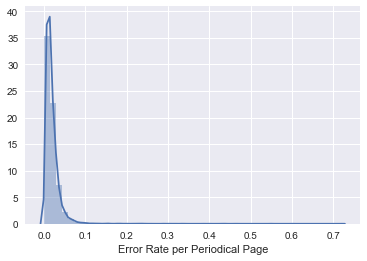

In [47]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [48]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 28888),
 ('e', 21981),
 ('m', 18615),
 ('d', 17477),
 ('w', 17328),
 ('n', 16327),
 ('t', 16272),
 ('r', 12146),
 ('g', 11323),
 ('f', 8369),
 ('th', 8144),
 ('pp', 6902),
 ('co', 5632),
 ('ex', 4129),
 ('u', 4106),
 ('x', 3480),
 ('tion', 2371),
 ('mo', 2269),
 ('wm', 1970),
 ('k', 1906),
 ('re', 1636),
 ('ment', 1611),
 ('eze', 1391),
 ('z', 1312),
 ("the'", 1295),
 ('altho', 1276),
 ("of'", 1121),
 ('ti', 1040),
 ('pa', 1030),
 ('wo', 985),
 ('sel', 935),
 ('q', 933),
 ('es', 906),
 ("an'", 878),
 ('ets', 852),
 ('al', 770),
 ('id', 713),
 ('va', 701),
 ('tions', 673),
 ('io', 643),
 ("''", 633),
 ('op', 618),
 ('ments', 614),
 ('mal', 577),
 ("if'", 564),
 ('aro', 554),
 ('ro', 553),
 ('ence', 540),
 ("and'", 534),
 ('oo', 525)]

## Correction 9 -- Separate Squashed Words

In [49]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = "correction8"
cycle = "correction9"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
    maxword = max(len(x) for x in sorted_list_of_words)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

ST18740604-V01-01-page2.txt: [('falseinterpretations', 'false interpretations')]
ST18740604-V01-01-page4.txt: [('miniswhentheyneededitmostinthesadcrisisoflast', 'minis when they needed it most in the sad crisis of last'), ('cluistprapcmeatoleadkisseryaittaiandit', 'c lu i st p rap c me a to lead kiss er y a it tai and it')]
ST18740611-V01-02-page5.txt: [('deservedlycondemned', 'deservedly condemned')]
ST18740625-V01-03-page6.txt: [('strictlytobusiness', 'strictly to business')]
ST18740709-V01-04-page5.txt: [('SystematiAenevolence', 'System at i A en e v o l e n c e')]
ST18740709-V01-04-page6.txt: [('thoughtrequirements', 'thought requirements')]
ST18740709-V01-04-page8.txt: [('ofthecostandvalueofredemptionthrough', 'of the cost and value of redemption through'), ('Ourworkininstitutingand', 'Our work in instituting and')]
ST18740723-V01-05-page2.txt: [('divinelycommissioned', 'divinely commissioned')]
ST18740723-V01-05-page4.txt: [('subscriptionwhichmayhavebeen', 'subscription which may

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ST/correction9

Average verified rate: 0.9813660899271024

Average of error rates: 0.01879286268425136

Total token count: 36322865



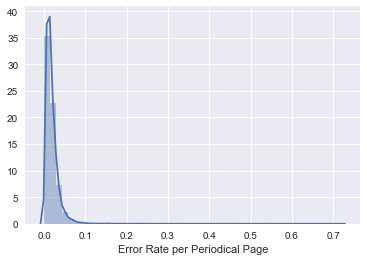

In [52]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [53]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 28888),
 ('e', 22198),
 ('m', 18752),
 ('d', 17513),
 ('w', 17407),
 ('n', 16506),
 ('t', 16450),
 ('r', 12271),
 ('g', 11370),
 ('f', 8448),
 ('th', 8144),
 ('pp', 6902),
 ('co', 5632),
 ('u', 4190),
 ('ex', 4129),
 ('x', 3486),
 ('tion', 2371),
 ('mo', 2269),
 ('wm', 1970),
 ('k', 1939),
 ('re', 1636),
 ('ment', 1611),
 ('eze', 1391),
 ('z', 1319),
 ("the'", 1295),
 ('altho', 1276),
 ("of'", 1121),
 ('ti', 1040),
 ('pa', 1030),
 ('wo', 985),
 ('sel', 935),
 ('q', 935),
 ('es', 906),
 ("an'", 878),
 ('ets', 852),
 ('al', 770),
 ('id', 713),
 ('va', 701),
 ('tions', 673),
 ('io', 643),
 ("''", 633),
 ('op', 618),
 ('ments', 614),
 ('mal', 577),
 ("if'", 564),
 ('aro', 554),
 ('ro', 553),
 ('ence', 540),
 ("and'", 534),
 ('oo', 525)]